In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

print("Libraries loaded successfully!")

/Users/rutujashingate/Desktop/mental-heatlh-detection/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Libraries loaded successfully!


In [ ]:
ds = load_dataset("solomonk/reddit_mental_health_posts")
print("Dataset downloaded!")
print(ds)

README.md:   0%|          | 0.00/425 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


adhd.csv:   0%|          | 0.00/29.6M [00:00<?, ?B/s]

aspergers.csv:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

depression.csv:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

ocd.csv:   0%|          | 0.00/29.8M [00:00<?, ?B/s]

ptsd.csv:   0%|          | 0.00/20.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/151288 [00:00<?, ? examples/s]

Dataset downloaded!
DatasetDict({
    train: Dataset({
        features: ['author', 'body', 'created_utc', 'id', 'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio', 'url'],
        num_rows: 151288
    })
})


In [3]:
df = ds['train'].to_pandas()
print(f"Total posts: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")

Total posts: 151288

Columns: ['author', 'body', 'created_utc', 'id', 'num_comments', 'score', 'subreddit', 'title', 'upvote_ratio', 'url']


In [4]:
df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151288 entries, 0 to 151287
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        151288 non-null  object 
 1   body          149679 non-null  object 
 2   created_utc   151288 non-null  object 
 3   id            151288 non-null  object 
 4   num_comments  151288 non-null  int64  
 5   score         151288 non-null  int64  
 6   subreddit     151288 non-null  object 
 7   title         151288 non-null  object 
 8   upvote_ratio  151288 non-null  float64
 9   url           151288 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 11.5+ MB


In [ ]:
# Renaming columns 
df = df.rename(columns={
    'author': 'user_id',
    'body': 'post_text',
    'created_utc': 'timestamp',
    'subreddit': 'label',
    'title': 'post_title'
})

In [7]:
df = df.drop(columns=['id', 'upvote_ratio', 'url'])

In [8]:

print("Columns after cleanup:")
print(df.columns.tolist())
print()
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print()

Columns after cleanup:
['user_id', 'post_text', 'timestamp', 'num_comments', 'score', 'label', 'post_title']

Shape: 151288 rows, 7 columns



In [ ]:
#cleaned data
df.head()

,user_id,post_text,timestamp,num_comments,score,label,post_title
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,1,1,ADHD,I get extremely anxious if I’m not working 24/7
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,3,5,ADHD,"I can't will myself to clean my own house, but..."
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,1,2,ADHD,i need some help
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,3,2,ADHD,Anyone up for a chat?
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,2,1,ADHD,Figuring out what to eat sucks


Posts per label (subreddit):
label
OCD           42826
ADHD          37109
depression    24031
ptsd          24028
aspergers     23294
Name: count, dtype: int64



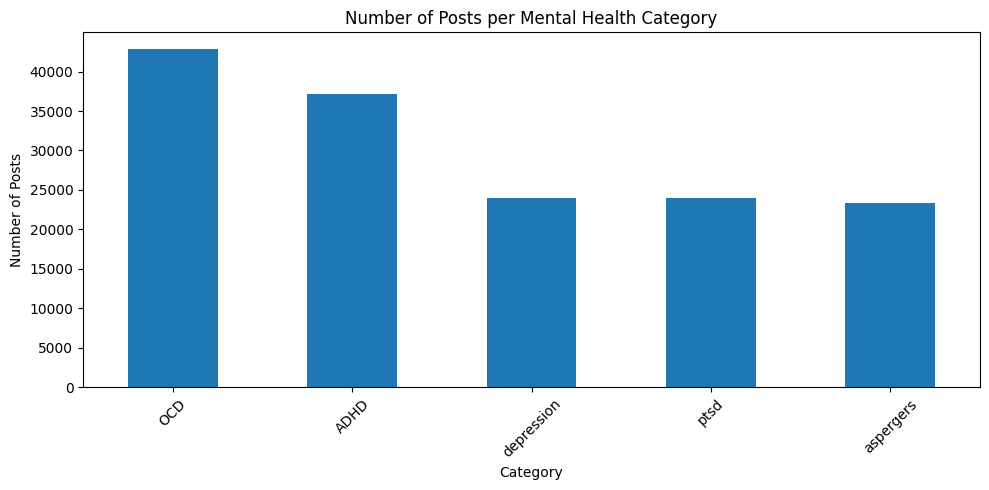

In [10]:
#Label distribution
print("Posts per label (subreddit):")
print(df['label'].value_counts())
print()

# Visualize it
df['label'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Number of Posts per Mental Health Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
#Unique users
num_users = df['user_id'].nunique()
print(f"Total unique users: {num_users}")
print(f"Average posts per user: {len(df) / num_users:.2f}")

Total unique users: 57757
Average posts per user: 2.62


In [12]:
#Posts per user distribution
posts_per_user = df.groupby('user_id').size()

print("Posts per user statistics:")
print(posts_per_user.describe())
print()
print(f"Users with 1 post only: {(posts_per_user == 1).sum()}")
print(f"Users with 2-5 posts: {((posts_per_user >= 2) & (posts_per_user <= 5)).sum()}")
print(f"Users with 6-10 posts: {((posts_per_user > 5) & (posts_per_user <= 10)).sum()}")
print(f"Users with 10+ posts: {(posts_per_user > 10).sum()}")
print(f"Users with 20+ posts: {(posts_per_user >= 20).sum()}")

Posts per user statistics:
count    57757.000000
mean         2.619388
std        223.432798
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      53695.000000
dtype: float64

Users with 1 post only: 43145
Users with 2-5 posts: 12766
Users with 6-10 posts: 1226
Users with 10+ posts: 620
Users with 20+ posts: 197


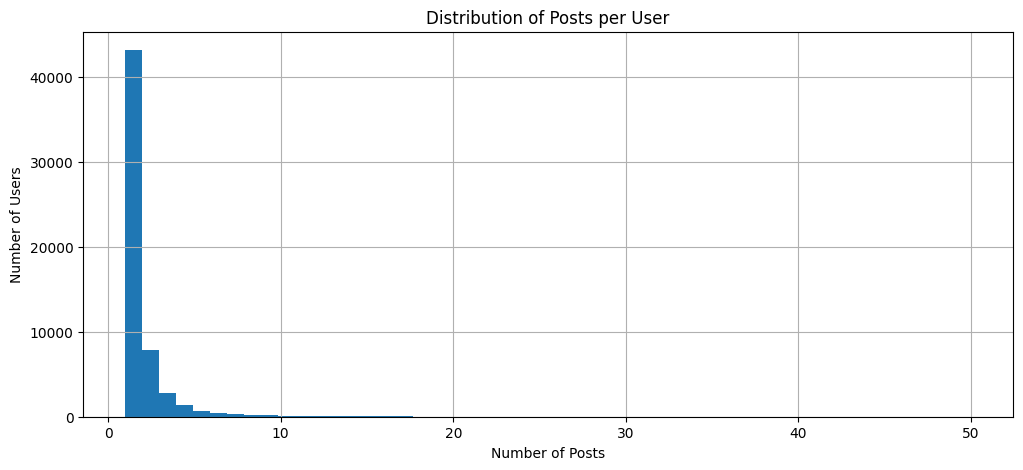

In [ ]:
#Distribution of posts per user
plt.figure(figsize=(12, 5))
posts_per_user.clip(upper=50).hist(bins=50)
plt.title('Distribution of Posts per User')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users')
plt.show()

In [15]:
# Set minimum posts threshold
MIN_POSTS = 5

# Find users with enough posts
posts_per_user = df.groupby('user_id').size()
valid_users = posts_per_user[posts_per_user >= MIN_POSTS].index.tolist()

print(f"Users with {MIN_POSTS}+ posts: {len(valid_users)}")

# Filter dataframe to only these users
df_longitudinal = df[df['user_id'].isin(valid_users)].copy()

print(f"Posts from these users: {len(df_longitudinal)}")
print(f"Percentage of original data: {len(df_longitudinal)/len(df)*100:.1f}%")

Users with 5+ posts: 2558
Posts from these users: 78530
Percentage of original data: 51.9%


In [ ]:
print("Label distribution for users with 5+ posts:")
print(df_longitudinal['label'].value_counts())
print()


users_per_label = df_longitudinal.groupby('label')['user_id'].nunique()
print("Unique users per label:")
print(users_per_label)

Label distribution for users with 5+ posts:
label
OCD           27285
aspergers     14148
ADHD          13771
ptsd          13227
depression    10099
Name: count, dtype: int64

Unique users per label:
label
ADHD           585
OCD           1061
aspergers      619
depression     342
ptsd           452
Name: user_id, dtype: int64


In [ ]:
# Pick a random user with multiple posts
sample_user = df_longitudinal['user_id'].value_counts().index[10]  # 10th most active user

# Get their posts ordered by time
user_timeline = df_longitudinal[df_longitudinal['user_id'] == sample_user].sort_values('timestamp')

print(f"User: {sample_user}")
print(f"Number of posts: {len(user_timeline)}")
print(f"Label: {user_timeline['label'].iloc[0]}")
print(f"Time span: {user_timeline['timestamp'].iloc[0]} to {user_timeline['timestamp'].iloc[-1]}")
print()
print("Their posts (first 5):")
for i, (_, row) in enumerate(user_timeline.head().iterrows()):
    text_preview = row['post_text'][:100] if pd.notna(row['post_text']) else "[empty]"
    print(f"\nPost {i+1}: {text_preview}...")

User: littledaisy_07
Number of posts: 71
Label: OCD
Time span: 2021-04-14T16:59:17.000Z to 2021-12-22T16:05:26.000Z

Their posts (first 5):

Post 1: Hello there! I’ll make it as short as I can.
I was diagnosed with OCD one month ago after spending s...

Post 2: Have some of you experienced improvement since you were diagnosed? And if so, how long did it take? ...

Post 3: Hello!
I need some advice. I’ve been doing CBT/ERP for almost 2 months now and my therapist suggests...

Post 4: I had a super upset evening yesterday which made me realise that even if I happen to "manage" my OCD...

Post 5: I’m fed up with needing to reread my assignments for hours, waste my whole night trying to reach my ...


In [18]:
# Check how many labels each user has
labels_per_user = df_longitudinal.groupby('user_id')['label'].nunique()

print("Labels per user:")
print(labels_per_user.value_counts().sort_index())
print()

if (labels_per_user == 1).all():
    print("✓ Confirmed: Each user posts in only ONE subreddit")
else:
    multi_label_users = (labels_per_user > 1).sum()
    print(f"Users posting in multiple subreddits: {multi_label_users}")

Labels per user:
label
1    2120
2     382
3      50
4       5
5       1
Name: count, dtype: int64

Users posting in multiple subreddits: 438


In [19]:
# Sort by user and timestamp (important for timelines!)
df_longitudinal = df_longitudinal.sort_values(['user_id', 'timestamp']).reset_index(drop=True)

# Save to CSV
df_longitudinal.to_csv('../data/longitudinal_data.csv', index=False)

print("✓ Saved to data/longitudinal_data.csv")
print(f"  - {len(df_longitudinal)} posts")
print(f"  - {df_longitudinal['user_id'].nunique()} users")
print(f"  - {df_longitudinal['label'].nunique()} labels")

✓ Saved to data/longitudinal_data.csv
  - 78530 posts
  - 2558 users
  - 5 labels


In [20]:
# For each user, find which subreddit they post in MOST
def get_primary_label(user_df):
    """Returns the label where user posts most frequently"""
    return user_df['label'].value_counts().index[0]

# Calculate primary label for each user
user_primary_label = df_longitudinal.groupby('user_id').apply(get_primary_label)
user_primary_label.name = 'primary_label'

print("Primary labels assigned!")
print(f"Users: {len(user_primary_label)}")
print()

# Preview
print("Example (first 10 users):")
print(user_primary_label.head(10))

Primary labels assigned!
Users: 2558

Example (first 10 users):
user_id
-PanFrog-                 OCD
-acidlean-               ADHD
-lousyd             aspergers
037_BATMAN                OCD
0hows_it_going0     aspergers
100magic                  OCD
1122hello1233      depression
1234hitujas              ADHD
15_trashaccount           OCD
18moreshirts       depression
Name: primary_label, dtype: object


/var/folders/zc/j2kbnvw90wsf40z_rnt6q41c0000gn/T/ipykernel_11617/2856767467.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_primary_label = df_longitudinal.groupby('user_id').apply(get_primary_label)


In [21]:
# Merge primary label back to main dataframe
df_multi = df_longitudinal.merge(
    user_primary_label.reset_index(), 
    on='user_id', 
    how='left'
)

print("Columns now:")
print(df_multi.columns.tolist())
print()
print(f"Shape: {df_multi.shape}")

Columns now:
['user_id', 'post_text', 'timestamp', 'num_comments', 'score', 'label', 'post_title', 'primary_label']

Shape: (78530, 8)


In [22]:
# How often does post label match user's primary label?
match_rate = (df_multi['label'] == df_multi['primary_label']).mean() * 100

print(f"Posts matching user's primary label: {match_rate:.1f}%")
print()

# Show cross-posting patterns
print("Users who cross-post (example):")
cross_posters = df_multi.groupby('user_id')['label'].nunique()
cross_poster_ids = cross_posters[cross_posters > 1].index[:3]  # First 3 cross-posters

for user_id in cross_poster_ids:
    user_data = df_multi[df_multi['user_id'] == user_id]
    print(f"\nUser: {user_id}")
    print(f"  Primary label: {user_data['primary_label'].iloc[0]}")
    print(f"  Posts per subreddit: {user_data['label'].value_counts().to_dict()}")

Posts matching user's primary label: 52.2%

Users who cross-post (example):

User: -acidlean-
  Primary label: ADHD
  Posts per subreddit: {'ADHD': 4, 'aspergers': 1}

User: 1234hitujas
  Primary label: ADHD
  Posts per subreddit: {'ADHD': 3, 'depression': 3}

User: 292to137
  Primary label: ptsd
  Posts per subreddit: {'ptsd': 6, 'ADHD': 2}


In [23]:
print("="*50)
print("FINAL DATASET SUMMARY")
print("="*50)
print()

print(f"Total posts: {len(df_multi)}")
print(f"Total users: {df_multi['user_id'].nunique()}")
print()

print("Users per PRIMARY label:")
print(df_multi.groupby('primary_label')['user_id'].nunique().sort_values(ascending=False))
print()

print("Posts per user statistics:")
print(df_multi.groupby('user_id').size().describe())

FINAL DATASET SUMMARY

Total posts: 78530
Total users: 2558

Users per PRIMARY label:
primary_label
OCD           960
aspergers     567
ADHD          456
ptsd          359
depression    216
Name: user_id, dtype: int64

Posts per user statistics:
count     2558.000000
mean        30.699765
std       1061.497990
min          5.000000
25%          5.000000
50%          7.000000
75%         10.000000
max      53695.000000
dtype: float64


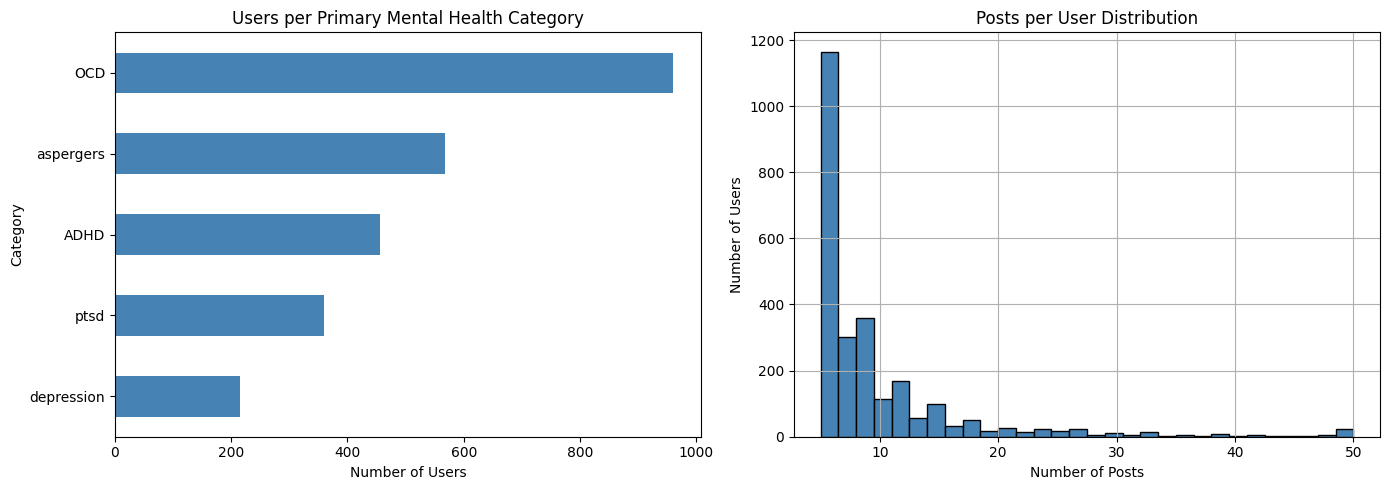

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Users per primary label
users_per_label = df_multi.groupby('primary_label')['user_id'].nunique().sort_values(ascending=True)
users_per_label.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Users per Primary Mental Health Category')
axes[0].set_xlabel('Number of Users')
axes[0].set_ylabel('Category')

# Plot 2: Posts per user distribution  
posts_per_user = df_multi.groupby('user_id').size()
posts_per_user.clip(upper=50).hist(bins=30, ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Posts per User Distribution')
axes[1].set_xlabel('Number of Posts')
axes[1].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()

In [ ]:
# Sort by user and timestamp 
df_multi = df_multi.sort_values(['user_id', 'timestamp']).reset_index(drop=True)

# Save
df_multi.to_csv('../data/final_dataset.csv', index=False)

print("✓ Saved to data/final_dataset.csv")
print(f"  - {len(df_multi)} posts")
print(f"  - {df_multi['user_id'].nunique()} users")
print(f"  - {df_multi['primary_label'].nunique()} labels")
print()
print("We will use 'primary_label' as our prediction target!")

✓ Saved to data/final_dataset.csv
  - 78530 posts
  - 2558 users
  - 5 labels

We will use 'primary_label' as our prediction target!
